# Как найти стог сена в иголке? Практический проект по построению системы поиска аномалий.

<b>Цель.</b> В этом домашнем задании вам предстоит настроить систему по поиску аномалий в банковских транзакциях. Мало того, что аномальных значений в данных меньше одного процента, так еще и переменные анонимизированные и представляют собой первые 28 главных компонент, полученных после PCA преобразования оригинальных данных (о которых мы ничего не знаем).
Смогут ли бравые unsupervised методы справится с такой задачей? Можно ли работать в таких условиях? Кто подставил кролика Роджера? Ответы на некоторые их этих вопросов вы узнаете после выполнения задания :)

<b>Описание/Пошаговая инструкция выполнения домашнего задания:</b>
1. Скачайте датасет с https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv
2. Проведите небольшой EDA (гистограммы и описательные статистики - обязательно).
3. Воспользуйтесь процентом аномалий, подсчитанным по переменной Class, как "экспертной оценкой" загрязненности нашего датасета.
4. Попробуйте построить различные модели и алгоритмы, разобранные на занятии, используя полученную экспертную оценку для настройки параметров.
5. Воспользуйтесь стандартными методами оценки качества бинарной классификации (особенно хорошо подойдёт classification report и confusion matrix), и, используя предсказания моделей и переменную Class, проверьте, действительно ли модели справляются со своей задачей и на сколько хорошо они это делают.
6. При помощи tSNE и/или UMAP, постройте сжатое представление исходных данных и проверьте, действительно ли аномалии лежат достаточно далеко от основной массы точек.

# Выполнение.

<b>1. Скачайте датасет с https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv</b>

1.1. Импортируем основные библиотеки.

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2.2. Считываем данные из CSV-файла. Выводим первые 5 строк, чтобы убедиться, что данные считались с локального файла.

In [2]:
df = pd.read_csv('creditcard.csv',)
pd.set_option('display.max_columns', None)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<b>2. Проведите небольшой EDA (гистограммы и описательные статистики - обязательно).</b>

2.1. Посмотрим на количество записей в файле.

In [3]:
df.shape

(284807, 31)

2.2. Посмотрим, какого типа эти данные:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

2.3. Посмотрим на количество уникальных записей для каждого признака:

In [5]:
df.apply(lambda x: x.nunique())

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

2.4. Посмотрим на основные статистические характеристики данных, такие как среднее значение, стандартное отклонение, минимальное и максимальное значения, и квартили.

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


2.5. Построим гистограммы для всех числовых столбцов в DataFrame df с заданным размером фигуры для отображения

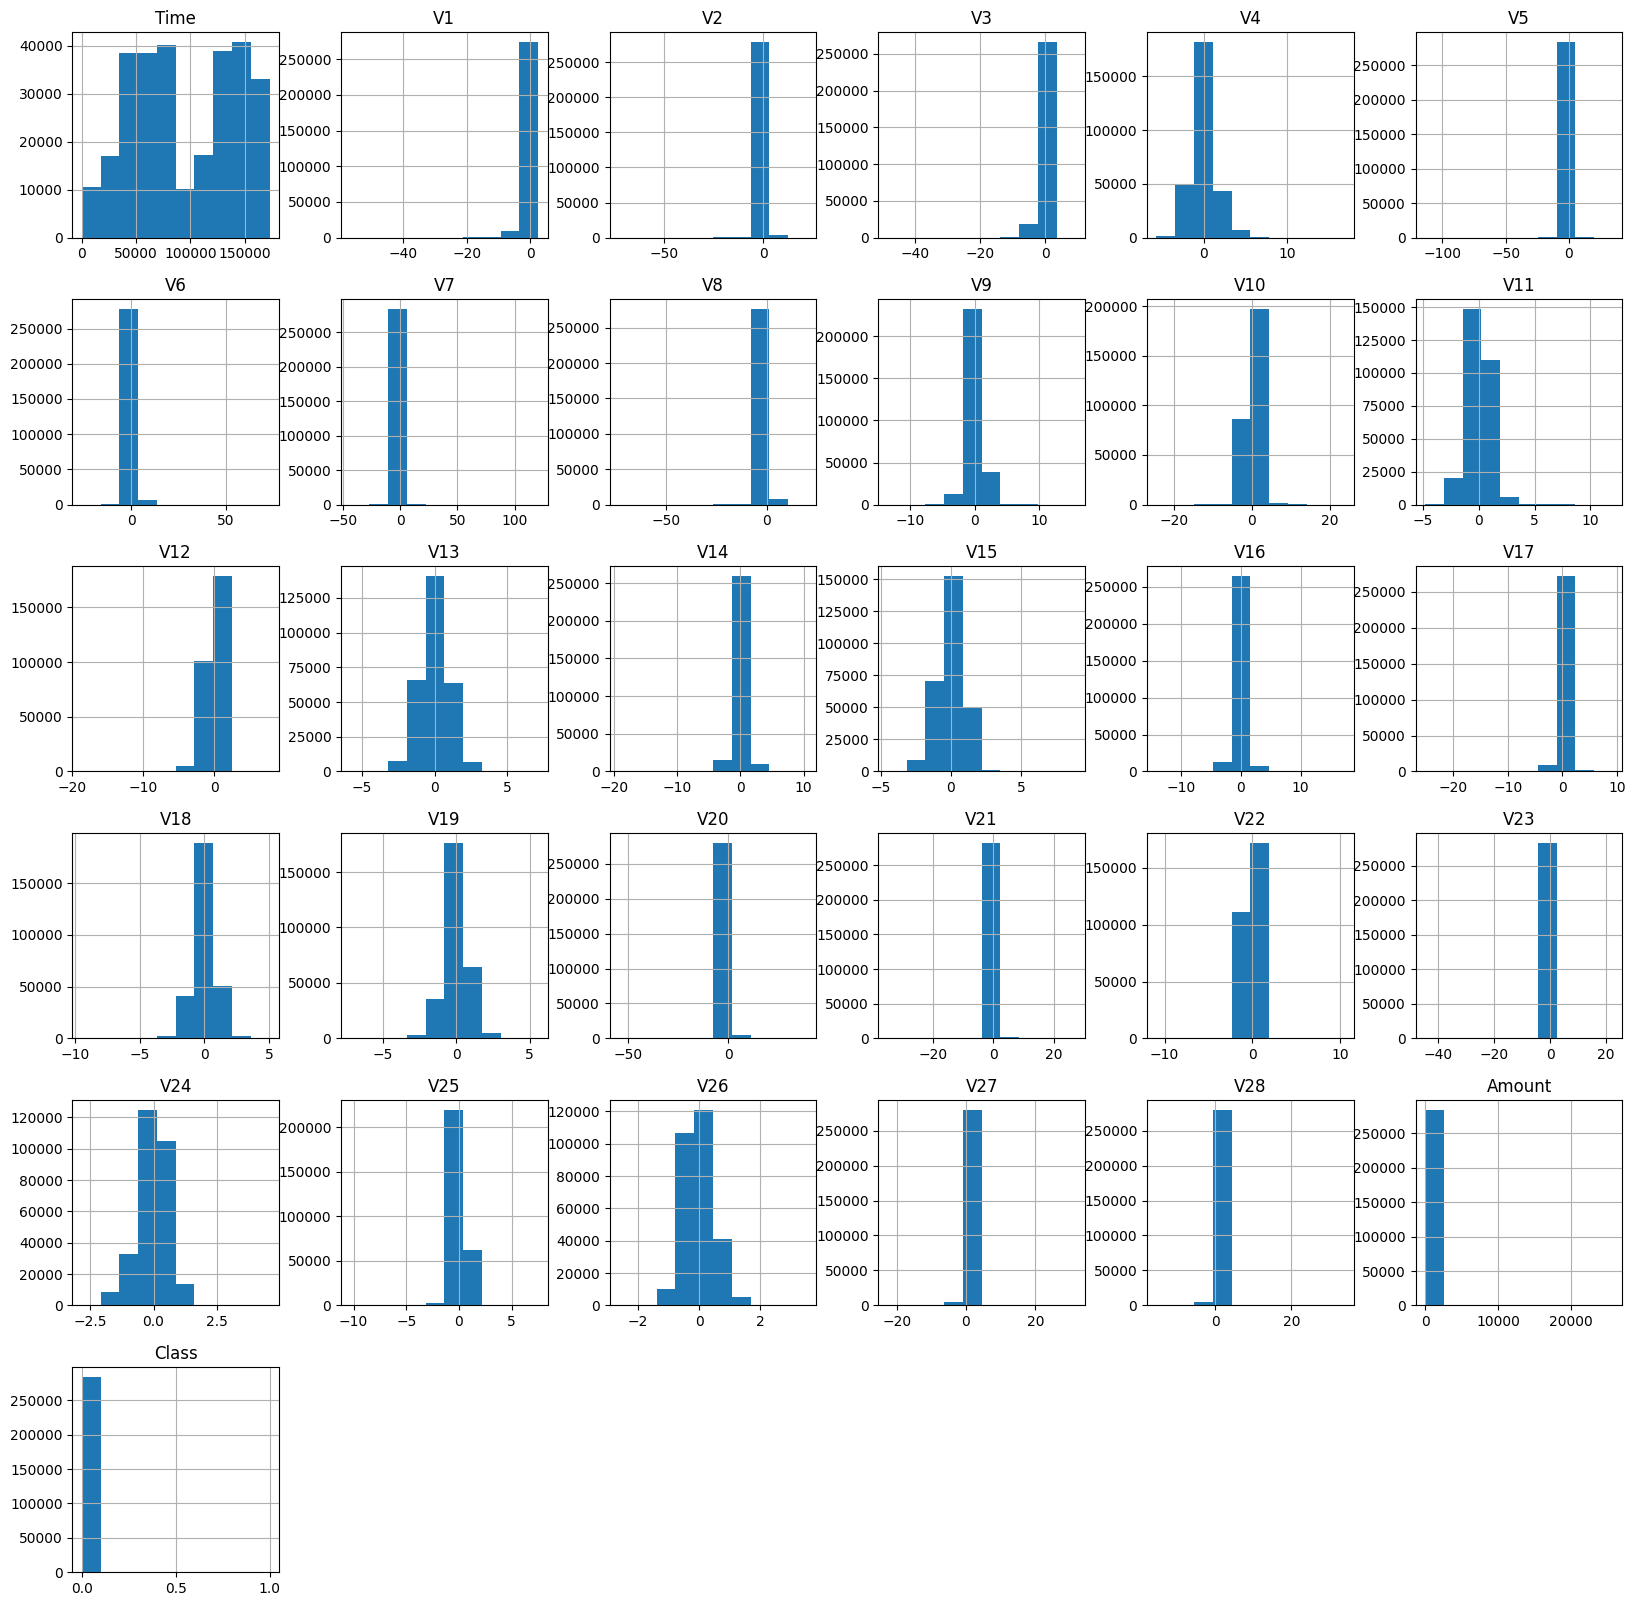

In [7]:
df.hist(figsize=(20, 20));

2.6. Построим тепловую карту (heatmap) для матрицы корреляции числовых переменных в данных с помощью библиотек matplotlib и seaborn, где коэффициенты корреляции отображаются в ячейках с аннотациями и цветовой шкалой, а нижний треугольник матрицы остается пустым для удобочитаемости.

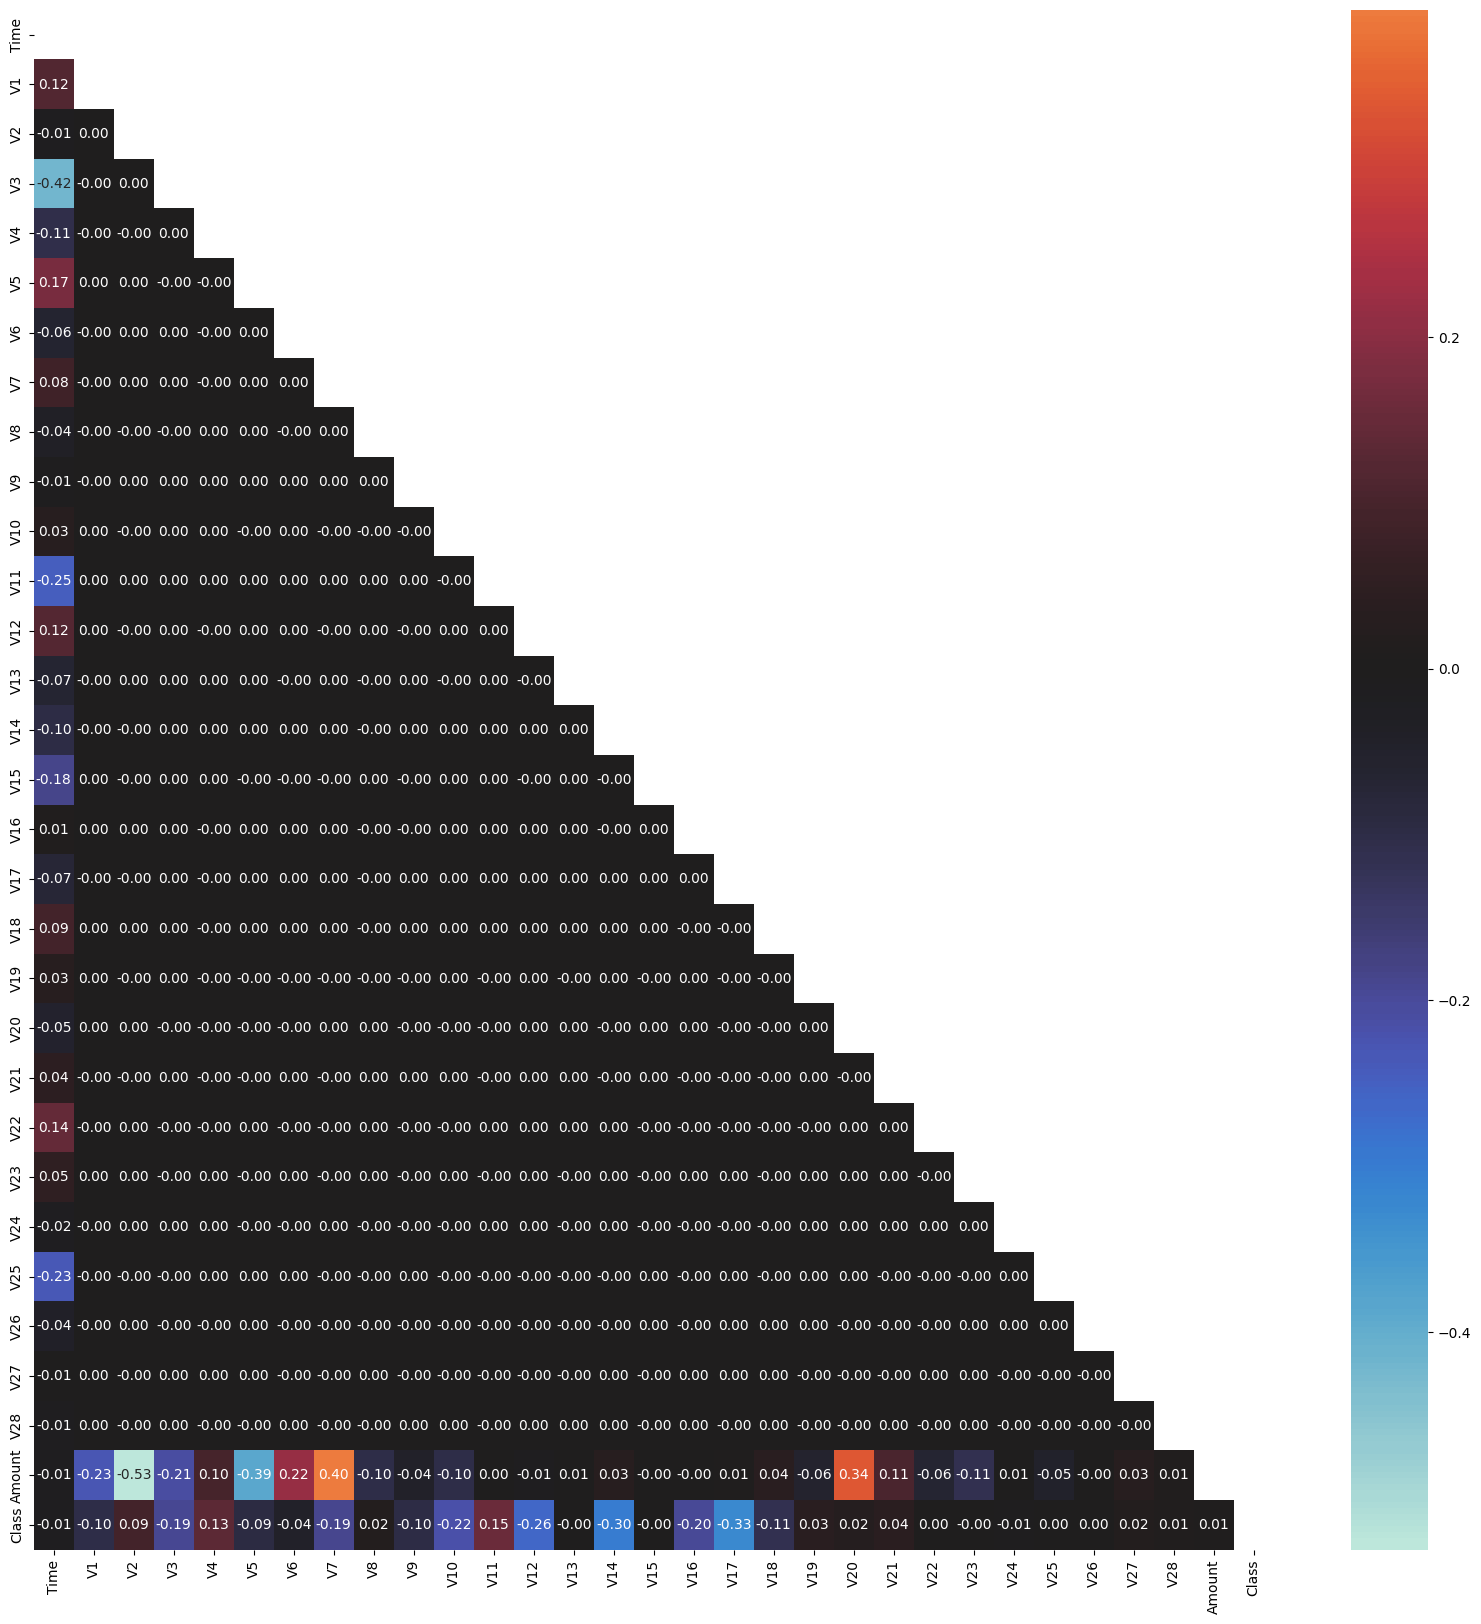

In [8]:
plt.figure(figsize=(20,20))

corr_matrix = df.corr()
lower = corr_matrix.where(np.tril(np.ones(corr_matrix.shape), k=-1).astype(bool))

sns.heatmap(lower, annot=True, fmt='.2f', cbar=True, center=0);

2.7. Создадим список high_corr, содержащий названия столбцов, которые имеют корреляцию с коэффициентом больше 0.5 или меньше -0.5 с другими столбцами в нижнем треугольнике матрицы корреляции.

In [9]:
high_corr = [
     column for column in lower.columns
     if any((lower[column] > 0.5)|(lower[column] < -0.5))
     ]
high_corr

['V2']

2.8. Уберём столбцы с высокой корелляцией. Избавление от столбцов с высокой корреляцией при поиске аномалий помогает избежать мультиколлинеарности, которая может исказить результаты анализа и осложнить интерпретацию данных. При выявлении аномалий важно иметь независимые и информативные признаки, и поэтому исключение сильно коррелирующих столбцов может улучшить качество моделирования и обнаружение аномалий.

In [10]:
df_corr = df.drop('V2', axis=1)
df_corr

,Time,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<b>3. Воспользуйтесь процентом аномалий, подсчитанным по переменной Class, как "экспертной оценкой" загрязненности нашего датасета.</b>

3.1. Вычислим процент аномалий в переменной "Class" и используем этот процент как "экспертную оценку" загрязненности датасета. В зависимости от значения процента аномалий выводится соответствующее сообщение о степени загрязненности.
</br>Признак "Класс" - принимает значение 1 в случае мошенничества и 0 в противном случае.

In [11]:
# Подсчёт процента аномалий в переменной 'Class' путём определения количества уникальных значений 'Class'=1.
anomaly_percent = df_corr['Class'].value_counts(normalize=True)[1] * 100

print(f"Процент аномалий в датасете: {anomaly_percent:.2f}%")

if anomaly_percent < 5:
    print("Загрязнённость датасета низкая.")
elif 5 <= anomaly_percent <= 20:
    print("Датасет имеет умеренную степень загрязненности.")
else:
    print("Датасет сильно загрязнён.")

Процент аномалий в датасете: 0.17%
Загрязнённость датасета низкая.


<b>4. Попробуйте построить различные модели и алгоритмы, разобранные на занятии, используя полученную экспертную оценку для настройки параметров.</b>

4.1. One-Class SVM (Support Vector Machine)

In [12]:
# Так как мы имеем дело с расстояниями - нужно убедиться, что все данные в одном масштабе
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = pd.DataFrame(
    data=scaler.fit_transform(df_corr),
    columns=df_corr.columns
)
scaled_data

,Time,V1,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-0.616237,1.228905,0.878152,-0.217859,0.631245,0.177406,0.142432,0.334787,0.185689,-0.345414,-0.740209,-0.745834,-0.393775,1.152959,-0.541507,0.309758,0.029437,0.437322,0.910463,0.026866,0.253109,-0.320791,0.032681,0.167619,-0.241182,0.816731,-0.246091,1.783274,0.0
1,-0.994983,0.524929,-0.006970,0.293974,0.087726,0.164395,-0.105740,0.117064,-0.164482,-0.074854,1.095465,0.903686,0.383407,-0.211569,0.476970,0.400979,-0.055612,-0.179787,-0.163363,-0.019150,-0.473332,-0.602719,0.363442,-0.479557,0.225462,0.313475,-0.063781,0.026519,-0.269825,0.0
2,-0.994972,-0.615587,0.830932,0.251024,-0.344345,1.778007,0.668164,0.420388,-1.179796,0.303796,0.437564,-0.072229,0.557465,-0.235704,1.865539,-2.982344,1.330783,-0.117763,-2.475385,1.703959,0.668917,0.714254,2.974603,-0.919589,-0.515430,-0.153111,-0.350218,-0.540962,4.983721,0.0
3,-0.994972,-0.440239,0.841250,-0.529808,0.033775,1.303832,0.175637,0.662489,-1.076888,0.038374,-0.128974,0.037307,0.397641,-0.368473,-0.551666,-1.135905,-0.700023,1.970088,-1.350843,-0.422194,-0.190105,-0.001408,-0.578786,-1.531963,0.944482,-0.298959,0.379163,0.382611,1.418291,0.0
4,-0.994960,-0.526089,0.713861,0.265632,-0.270695,0.317183,0.491625,-0.546463,0.700808,0.855099,-0.525992,0.388903,1.036898,-1.273801,0.103149,-0.522390,-0.193970,-0.034570,0.873809,1.366227,0.048266,0.739092,-0.407980,0.126293,-0.333308,0.976221,1.347133,1.553716,0.670579,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-5.321622,-5.222589,-1.285699,-4.073679,-1.999082,-4.409307,13.588260,1.585066,4.496984,-1.038786,2.512096,-0.515381,4.981193,-0.789580,1.050330,2.328857,0.514445,-0.750239,4.461946,0.585633,0.098124,3.314091,-0.693006,2.126512,0.532055,5.820867,6.190862,-0.296653,0.0
284803,1.034963,-0.335820,0.967471,-0.451476,0.707747,1.142041,-0.014027,0.508439,0.512990,-0.892515,-0.078179,0.757728,0.936905,-0.789948,0.906759,-0.784974,0.045259,-1.217961,-1.692755,0.354148,0.587444,0.856848,0.076436,-1.331299,-0.933155,-0.604145,0.414680,-0.493534,0.038986,0.0
284804,1.034975,0.850377,-1.788463,-0.337932,2.059687,2.832770,-0.299623,1.280019,0.390154,-0.396083,0.295836,-0.075125,-0.129767,-0.610851,1.040194,0.074952,0.429214,0.399426,-0.634786,0.185279,0.630455,0.533612,-0.085005,0.754500,0.373060,-0.062034,0.019227,-0.288058,0.641096,0.0
284805,1.034975,-0.115629,0.272567,0.445763,-0.248270,0.769496,-0.645865,1.225405,0.357606,-0.309505,-1.265633,-1.077269,-0.784500,0.434323,1.554343,-0.680892,0.651561,1.118001,3.162108,0.550857,0.710499,0.740745,-0.491472,0.103549,-0.877058,1.054357,0.663921,0.710829,-0.167680,0.0


In [13]:
from sklearn.svm import OneClassSVM

# Процент аномалий в датасете: 0.17%
anomaly_percent = 0.17 / 100

# nu - Верхняя граница доли ошибок обучения и нижняя граница доли опорных векторов.
one_class_svm = OneClassSVM(nu=anomaly_percent, gamma='auto')
one_class_svm.fit(scaled_data)
svm_outliers = one_class_svm.predict(scaled_data)
svm_outliers = np.array([1 if label == -1 else 0 for label in svm_outliers])

In [14]:
# Вывод информации по аномальным транзакциям и выбросам
print('Количество выбросов в выборке: {}'.format(sum(svm_outliers)))
print('Процент выбросов в выборке: {:.2%}'.format(sum(svm_outliers )/len(df_corr)))

Количество выбросов в выборке: 2630
Процент выбросов в выборке: 0.92%


4.2. Isolation Forest

In [15]:
from sklearn.ensemble import IsolationForest
isolation_forest = IsolationForest(n_estimators=100, contamination=anomaly_percent,
                                   max_features=1.0, bootstrap=True)
isolation_forest.fit(scaled_data)

isolation_outliers = isolation_forest.predict(scaled_data)
isolation_outliers = np.array([1 if label == -1 else 0 for label in isolation_outliers])

In [16]:
# Вывод информации по аномальным транзакциям и выбросам
print('Количество выбросов в выборке: {}'.format(sum(isolation_outliers)))
print('Процент выбросов в выборке: {:.2%}'.format(sum(isolation_outliers)/len(df_corr)))

Количество выбросов в выборке: 485
Процент выбросов в выборке: 0.17%


4.3. DBSCAN

In [17]:
from sklearn.cluster import DBSCAN

# для начала считаем все наблюдения аномальными
outlier_percentage = 1.

num_clusters = []
anomaly_percentage = []

# берем маленький эпсилон и начинаем увеличивать
eps = 0.05
eps_history = [eps]
while outlier_percentage>0.1:
    model = DBSCAN(eps=eps).fit(scaled_data)
    labels = model.labels_
    num_clusters.append(len(np.unique(labels))-1)
    labels = np.array([1 if label == -1 else 0 for label in labels])
    # считаем текущий процент "шума"
    outlier_percentage = sum(labels==1) / len(labels)
    eps += 0.05
    eps_history.append(eps)
    anomaly_percentage.append(outlier_percentage)

model = DBSCAN(eps)
model.fit(scaled_data)
density_outliers = np.array([1 if label == -1 else 0 for label in model.labels_])

In [18]:
eps_history

[0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.3,
 0.35,
 0.39999999999999997,
 0.44999999999999996,
 0.49999999999999994,
 0.5499999999999999,
 0.6,
 0.65,
 0.7000000000000001,
 0.7500000000000001,
 0.8000000000000002,
 0.8500000000000002,
 0.9000000000000002,
 0.9500000000000003,
 1.0000000000000002,
 1.0500000000000003,
 1.1000000000000003,
 1.1500000000000004,
 1.2000000000000004,
 1.2500000000000004,
 1.3000000000000005,
 1.3500000000000005,
 1.4000000000000006,
 1.4500000000000006,
 1.5000000000000007,
 1.5500000000000007,
 1.6000000000000008,
 1.6500000000000008,
 1.7000000000000008,
 1.7500000000000009,
 1.800000000000001,
 1.850000000000001,
 1.900000000000001,
 1.950000000000001,
 2.000000000000001,
 2.0500000000000007,
 2.1000000000000005,
 2.1500000000000004,
 2.2,
 2.25,
 2.3,
 2.3499999999999996,
 2.3999999999999995,
 2.4499999999999993,
 2.499999999999999,
 2.549999999999999,
 2.5999999999999988,
 2.6499999999999986,
 2.6999999999999984,
 2.7499999999999982,
 2.79999

In [19]:
# Вывод информации по аномальным транзакциям и выбросам
print('Количество выбросов в выборке: {}'.format(sum(density_outliers)))
print('Процент выбросов в выборке: {:.2%}'.format(sum(density_outliers)/len(df_corr)))

Количество выбросов в выборке: 27024
Процент выбросов в выборке: 9.49%


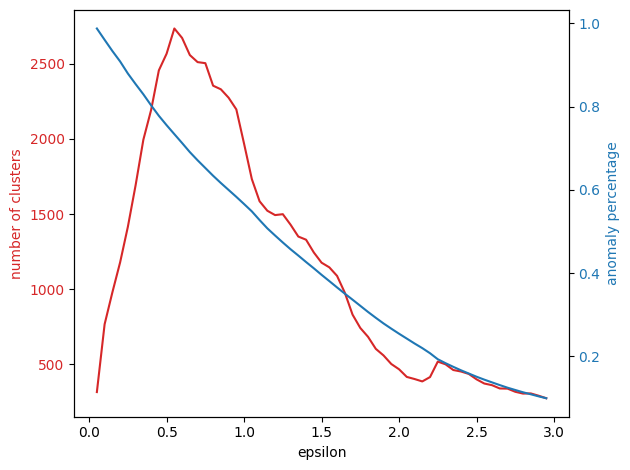

In [20]:
iterations = eps_history[:-1]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('epsilon')
ax1.set_ylabel('number of clusters', color=color)
ax1.plot(iterations, num_clusters, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('anomaly percentage', color=color)
ax2.plot(iterations, anomaly_percentage, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

<b>5. Воспользуйтесь стандартными методами оценки качества бинарной классификации (особенно хорошо подойдёт classification report и confusion matrix), и, используя предсказания моделей и переменную Class, проверьте, действительно ли модели справляются со своей задачей и на сколько хорошо они это делают.</b>

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

y = scaled_data["Class"]

# Оцениваем модель One-Class SVM
print("Classification Report для One-Class SVM:")
print(classification_report(y, svm_outliers))
conf_matrix_svm = confusion_matrix(y, svm_outliers)
print("Confusion Matrix для One-Class SVM:")
print(conf_matrix_svm)

# Оцениваем модель Isolation Forest
print("\nClassification Report для Isolation Forest:")
print(classification_report(y, isolation_outliers))
conf_matrix_if = confusion_matrix(y, isolation_outliers)
print("Confusion Matrix для Isolation Forest:")
print(conf_matrix_if)

# Оцениваем модель DBSCAN
print("\nClassification Report для DBSCAN:")
print(classification_report(y, density_outliers))
conf_matrix_dbscan = confusion_matrix(y, density_outliers)
print("Confusion Matrix для DBSCAN:")
print(conf_matrix_dbscan)

Classification Report для One-Class SVM:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    284315
         1.0       0.06      0.29      0.09       492

    accuracy                           0.99    284807
   macro avg       0.53      0.64      0.54    284807
weighted avg       1.00      0.99      0.99    284807

Confusion Matrix для One-Class SVM:
[[281830   2485]
 [   347    145]]

Classification Report для Isolation Forest:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    284315
         1.0       0.33      0.32      0.33       492

    accuracy                           1.00    284807
   macro avg       0.66      0.66      0.66    284807
weighted avg       1.00      1.00      1.00    284807

Confusion Matrix для Isolation Forest:
[[283989    326]
 [   333    159]]

Classification Report для DBSCAN:
              precision    recall  f1-score   support

         0.0       1.00  

<b>6. При помощи tSNE и/или UMAP, постройте сжатое представление исходных данных и проверьте, действительно ли аномалии лежат достаточно далеко от основной массы точек.</b>

In [22]:
X = scaled_data.drop("Class", axis=1)

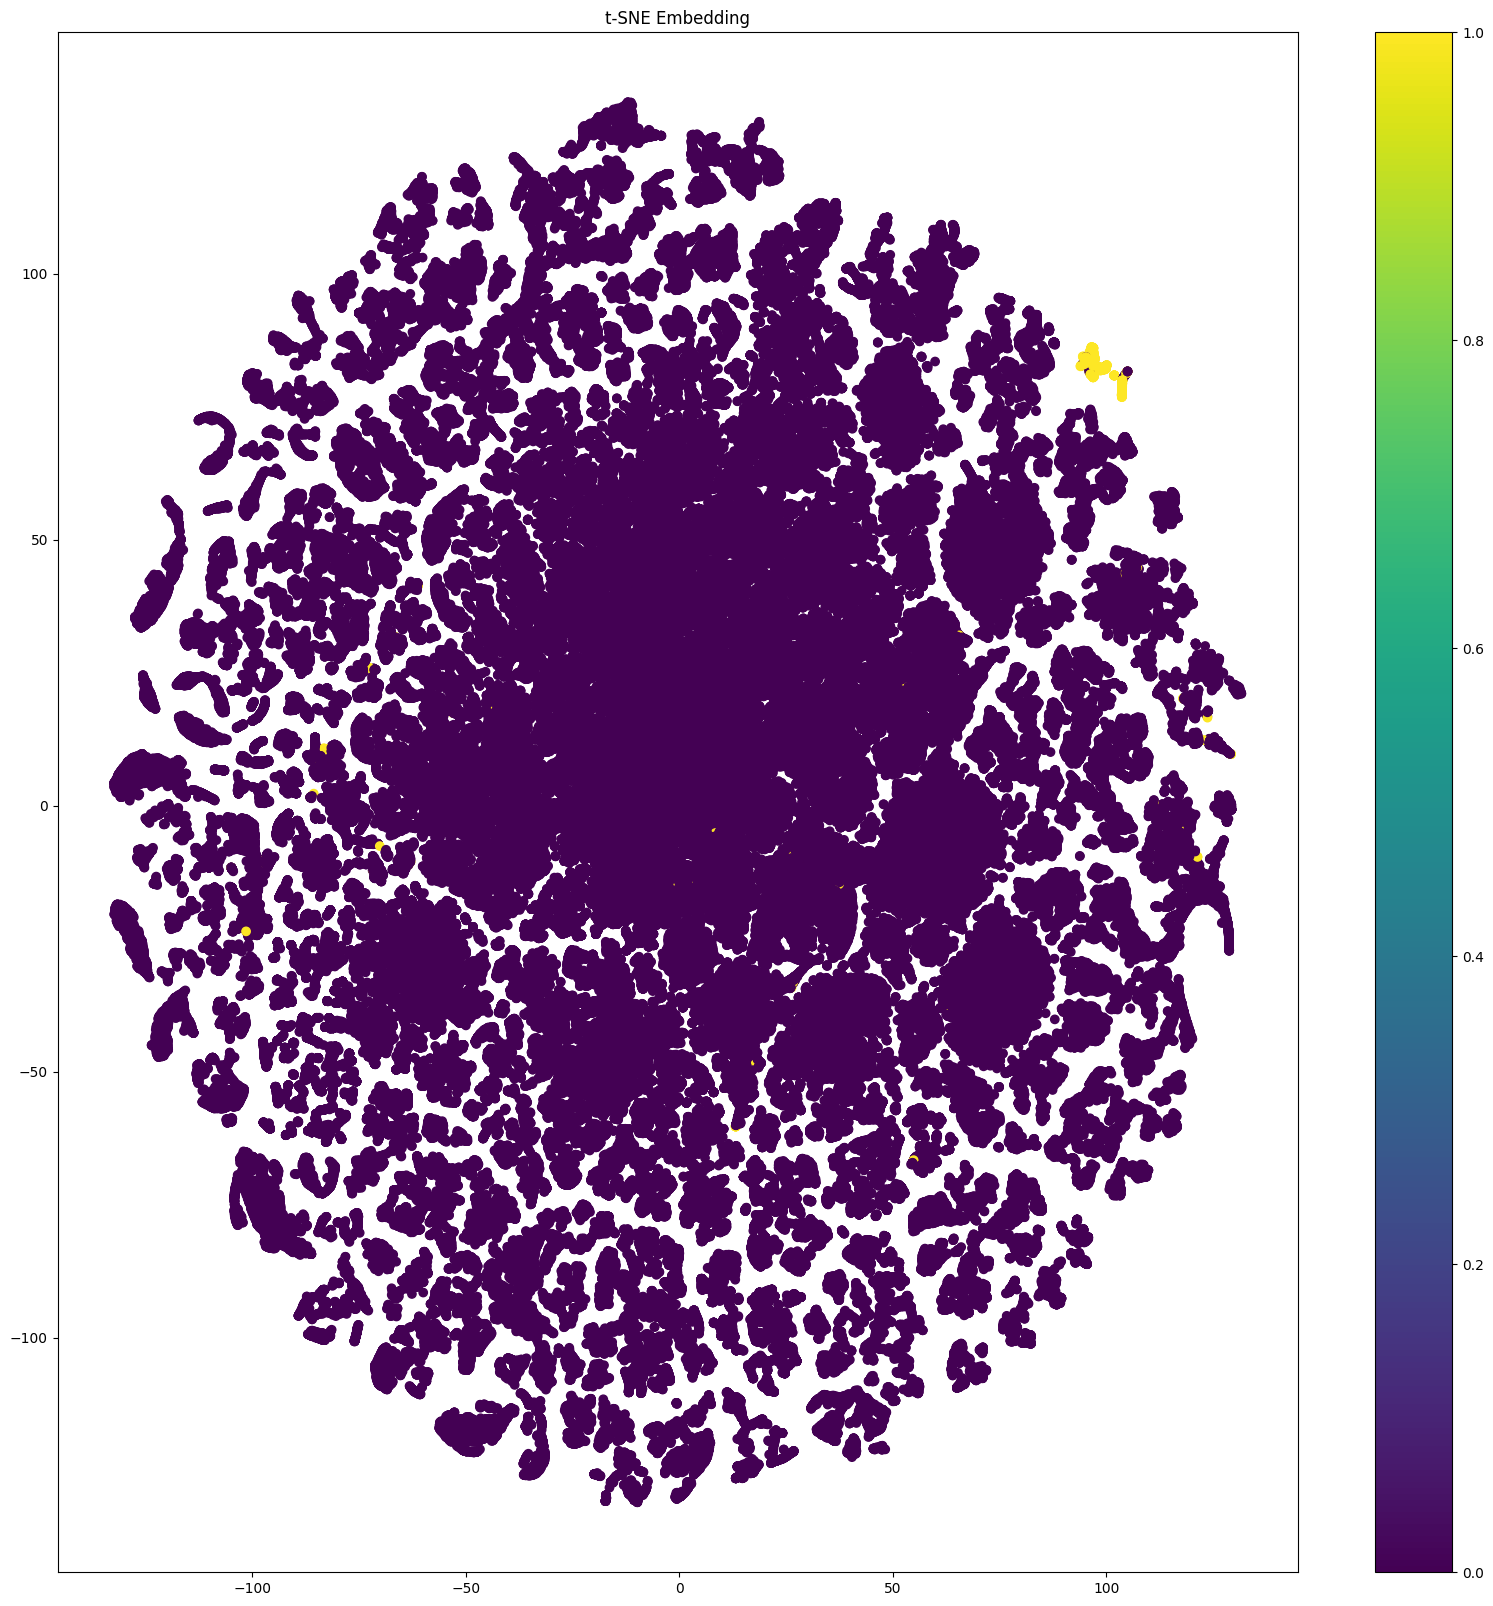

In [24]:
from sklearn.manifold import TSNE

# Применяем t-SNE для сжатия исходных данных
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Визуализируем данные с помощью t-SNE
plt.figure(figsize=(20, 20))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis')
plt.title('t-SNE Embedding')
plt.colorbar()

plt.show()

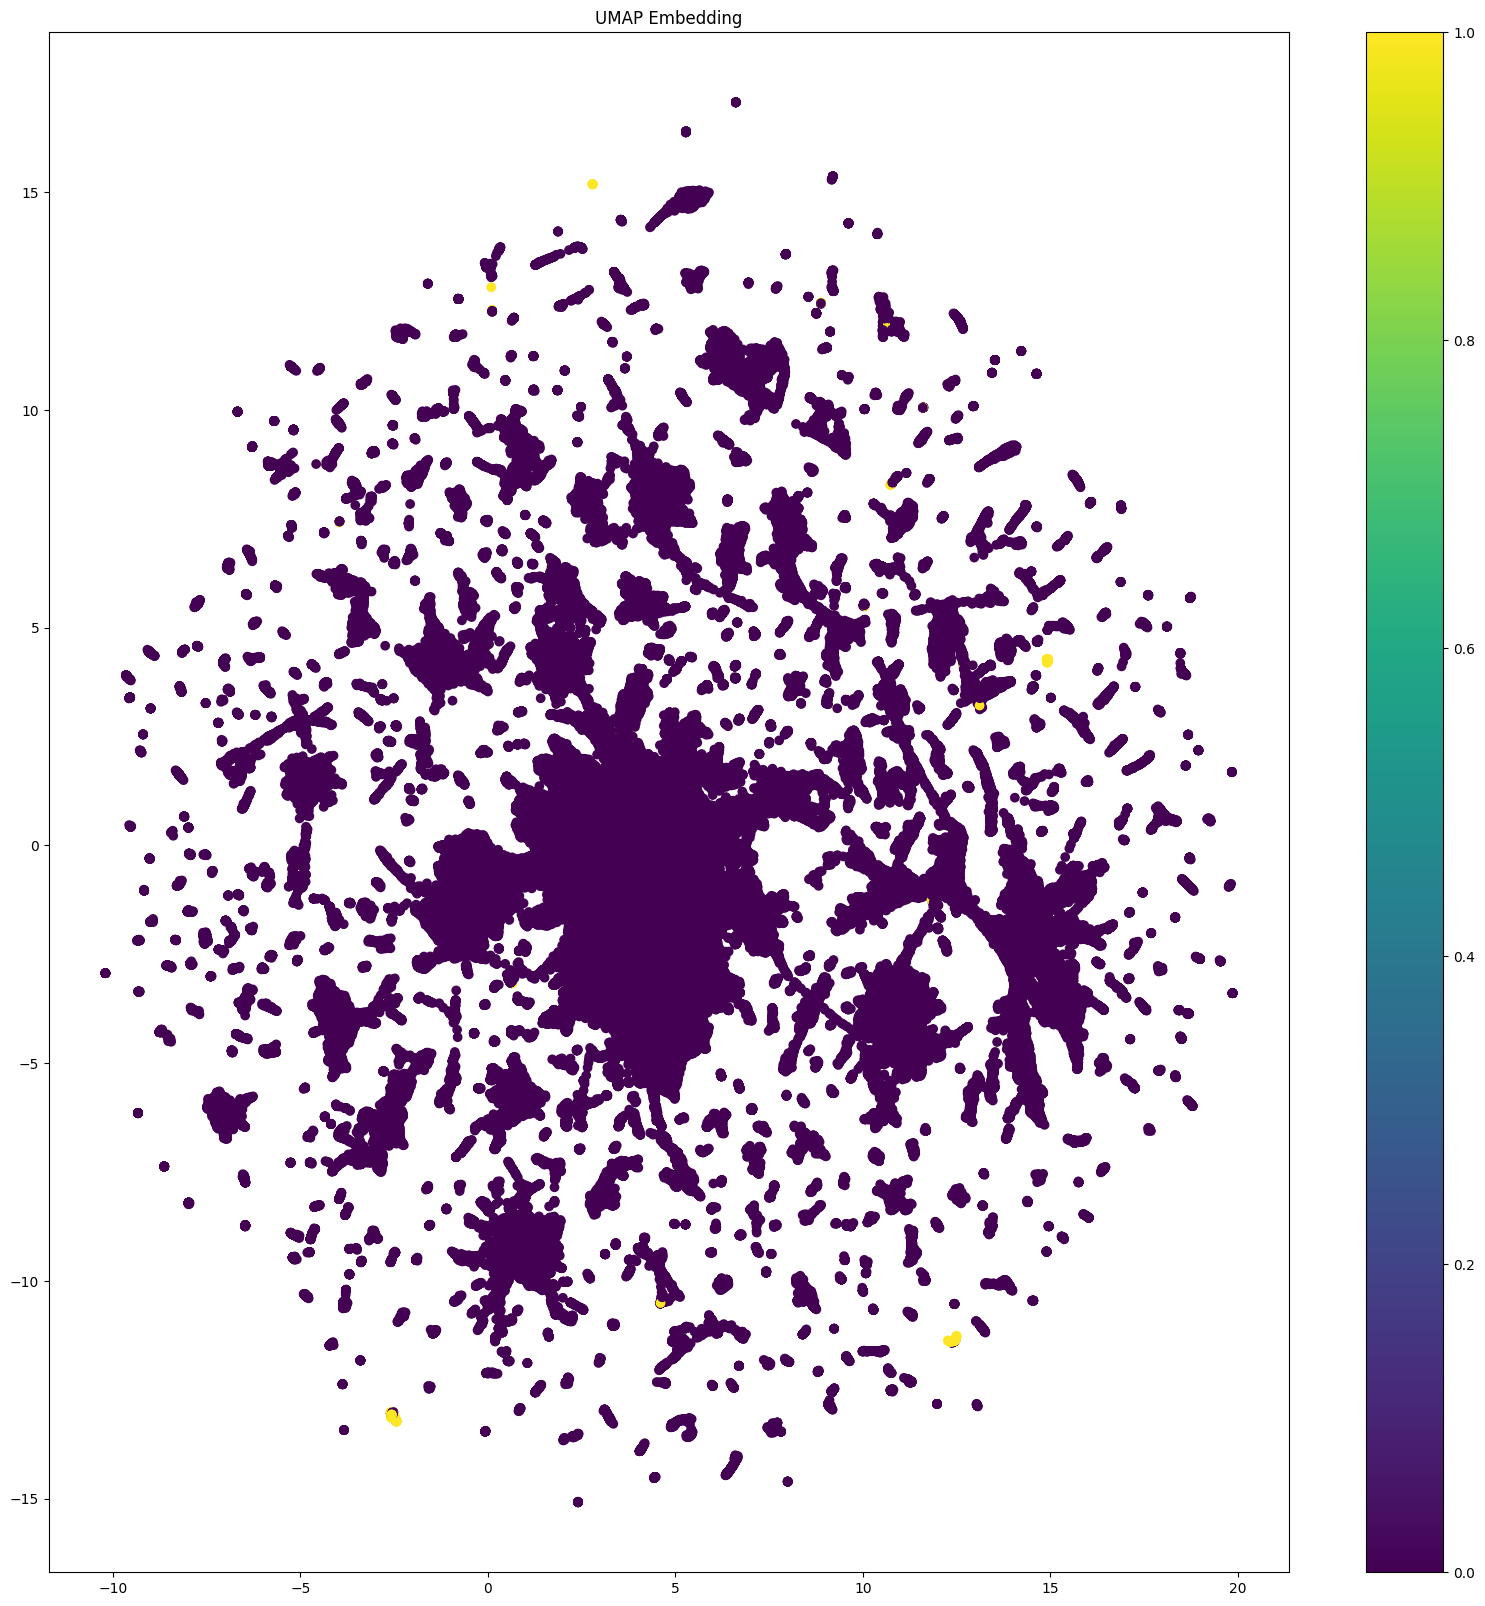

In [33]:
import umap;

# Применяем UMAP для сжатия исходных данных
umap_emb = umap.UMAP(n_components=2, n_jobs=-1);
X_umap = umap_emb.fit_transform(X);

# Визуализируем данные с помощью UMAP
plt.figure(figsize=(20, 20));
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis');
plt.title('UMAP Embedding');
plt.colorbar();

plt.show();